![Logo TUBAF](https://tu-freiberg.de/sites/default/files/media/freiberger-alumni-netzwerk-6127/wbm_orig_rgb_0.jpg)

Exercise material of the MSc-level course **Numerical Methods in Geotechnical Engineering**.
Held at Technische Universität Bergakademie Freiberg.

Comments to:

*Prof. Dr. Thomas Nagel  
Chair of Soil Mechanics and Foundation Engineering  
Geotechnical Institute  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/soilmechanics


# Exercise 5 -- Soil column under its own weight

![soil_column.png](Images/soil_column.png)

The differential equation of the **equilibrium conditions** for this 1D example reads (soil mechanical sign convention)

$$
\sigma_{zz,z} + \varrho g = 0
$$

Using the **constitutive law**

$$
\sigma_{zz} = E_\text{s} \epsilon_{zz}
$$

and the **kinematical relationship**

$$
\epsilon_{zz} = - u_{z,z}
$$

we arrive at a second-order ordinary differential equation with constant coefficients in terms of the vertical displacement:

$$
\boxed{u_{z,zz} = \frac{\varrho g}{E_\text{s}}}
$$

Observe the distinction between a general balance law, a specific constitutive law, and geometric relations (kinematics). The combination yields the problem-specific governing equation.

## Analytical solution

Integrating twice yields:

$$
u_z = \frac{\varrho g}{2E_\text{s}} z^2 + C_1 z + C_2
$$

The boundary conditions 

$$
u_z(z=0) = 0 \qquad \text{and} \qquad \sigma_{zz}(z=H) \propto u_{z,z}(z=H) = 0
$$

allow us to determine the integration constants

$$
C_1 = -\frac{\varrho g H}{E_\text{s}} \qquad \text{and} \qquad C_2 = 0
$$

Thus, the final solution of the problem is given as

$$
\boxed{u_z(z) = \frac{\varrho gH^2}{2E_\text{s}} \left[ \left(\frac{z}{H}\right)^2 - 2 \frac{z}{H} \right]}
$$

The stress distribution follows as

$$
\boxed{\sigma_{zz}(z) = \varrho g H \left(1 - \frac{z}{H} \right)}
$$

In [117]:
import numpy as np #numerical methods
import sympy as sp #symbolic operations
sp.init_printing(use_latex='mathjax') #makes sympy output look nice

#Some plot settings
#import plot_functions.plot_settings
%run plot_functions/plot_settings.py

We insert the dimensionless coordinate $\xi = \displaystyle \frac{z}{H} \in [0,1]$ for simplicity and provide the analytical solutions as functions:

In [118]:
#xi is the dimensionless coordinate z/H
displacement_analytical = lambda xi: xi**2. - 2. * xi
stress_analytical = lambda xi: 1. - xi

In [119]:
coord = np.linspace(0.,1.,100)

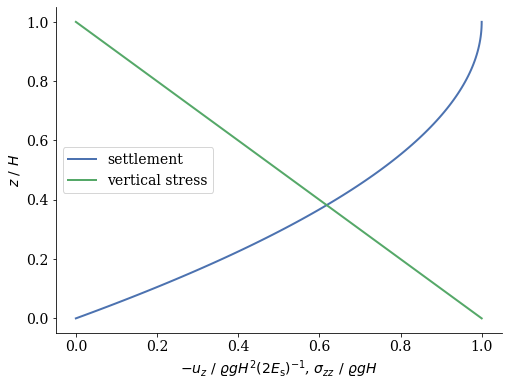

In [120]:
plt.plot(-displacement_analytical(coord),coord,label='settlement')
plt.plot(stress_analytical(coord),coord,label='vertical stress')
plt.legend()
plt.xlabel('$-u_z\ /\ \\varrho g H^2 (2 E_\\mathrm{s})^{-1}$, $\\sigma_{zz}\ /\ \\varrho g H$')
plt.ylabel('$z\ /\ H$');

We now seek approximate displacement solutions to the second-order ODE

$$
    E_\text{s} u_{z,zz} = \varrho g
$$

and will use different methods introduced in the lecture material.

## Collocation method

We start by polynomials. Choosing a linear Ansatz $\tilde{u}_z = a z$ does not work since $\tilde{u}_{z,zz} = 0$. A quadratic Ansatz of the following form

$$
    \tilde{u}_z = \frac{a}{2} z^2 + b z
$$

fulfills the boundary condition $\tilde{u}_z(z = 0) = 0$. To fulfill the top bc $\tilde{u}_{z,z}(z = H) = 0$ with

$$
    \tilde{u}_{z,z} = a z + b
$$

we find $b = -a H$ and thus end up with the one-parameter Ansatz

$$
    \tilde{u}_z = \frac{a}{2} z^2 - a H z
$$

Substituting this Ansatz into the ODE yields

$$
    a = \frac{\varrho g}{E_\text{s}}
$$

We see that the choice of a collocation point has become arbitrary and the solution is directly determined by the boundary conditions and the ODE itself.

The solution is thus given as

$$
    \tilde{u}_z = \frac{\varrho g H^2}{2E_\text{s}} \left[ \left(\frac{z}{H}\right)^2 - 2 \frac{z}{H} \right]
$$

which turns out to be the exact solution as we happend to choose an Ansatz that corresponds to the shape of the exact solution.

To better illustrate the method, let's choose a trigonometric Ansatz:

$$
    \tilde{u}_z = a \sin \left( \frac{\pi z}{2H} \right)
$$

which also fulfills all boundary conditions. Substitution into the ODE yields

$$
    \frac{\pi^2 a}{4 H^2} \sin \left( \frac{\pi}{2} \xi \right) = -\frac{\varrho g}{E_\text{s}} \quad \text{with} \quad \xi = \frac{z}{H}
$$

We have one unknown, so we need one collocation point. We conveniently choose that at $\xi_1 = 1/3$ because $\sin (\pi/6) = 0.5$. Thus, we find

$$
    a = -\frac{8 \varrho g H^2}{E_\text{s} \pi^2}
$$

Thus, the solution reads

$$
    \tilde{u}_z = -\frac{\varrho g H^2}{2 E_\text{s}} \frac{16}{\pi^2}  \sin \left( \frac{\pi }{2} \xi \right)
$$

and

$$
    \sigma_{zz} = \varrho g H \frac{4}{\pi} \cos \left( \frac{\pi }{2} \xi \right)
$$

In [121]:
displacement_collocation = lambda xi: - 16/(np.pi**2) * np.sin(np.pi/2 * xi)
stress_collocation = lambda xi: 4/np.pi * np.cos(np.pi/2 * xi)

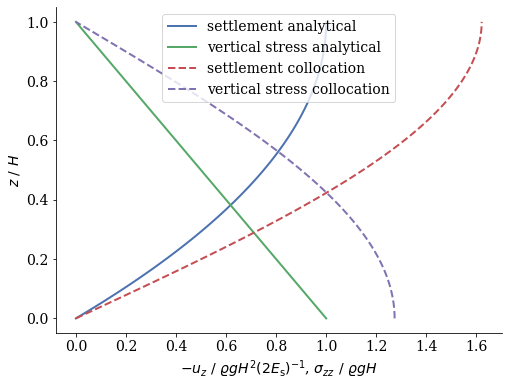

In [122]:
plt.plot(-displacement_analytical(coord),coord,label='settlement analytical')
plt.plot(stress_analytical(coord),coord,label='vertical stress analytical')
plt.plot(-displacement_collocation(coord),coord,label='settlement collocation',ls='--')
plt.plot(stress_collocation(coord),coord,label='vertical stress collocation',ls='--')
plt.legend()
plt.xlabel('$-u_z\ /\ \\varrho g H^2 (2 E_\\mathrm{s})^{-1}$, $\\sigma_{zz}\ /\ \\varrho g H$')
plt.ylabel('$z\ /\ H$');

The approximation is neither qualitatively nor quantitatively very good. We saw above that the solution for $a$ is strongly dependent on the location of the collocation point. Let's try another: $\xi = 2/3$. Then, $\sin (\pi/3) = \sqrt(3)/2$ and

$$
     a = -\frac{8 \varrho g H^2}{\sqrt{3}E_\text{s} \pi^2}
$$

Thus, the solution reads

$$
    \tilde{u}_z = -\frac{\varrho g H^2}{2 E_\text{s}} \frac{16}{\sqrt{3}\pi^2}  \sin \left( \frac{\pi }{2} \xi \right)
$$

and

$$
    \sigma_{zz} = \varrho g H \frac{4}{\sqrt{3}\pi} \cos \left( \frac{\pi }{2} \xi \right)
$$

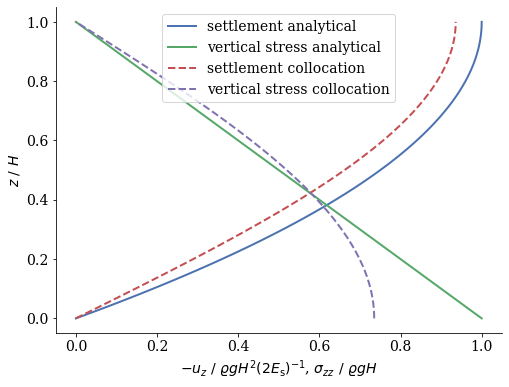

In [123]:
plt.plot(-displacement_analytical(coord),coord,label='settlement analytical')
plt.plot(stress_analytical(coord),coord,label='vertical stress analytical')
plt.plot(-displacement_collocation(coord)/np.sqrt(3),coord,label='settlement collocation',ls='--')
plt.plot(stress_collocation(coord)/np.sqrt(3),coord,label='vertical stress collocation',ls='--')
plt.legend()
plt.xlabel('$-u_z\ /\ \\varrho g H^2 (2 E_\\mathrm{s})^{-1}$, $\\sigma_{zz}\ /\ \\varrho g H$')
plt.ylabel('$z\ /\ H$');

# Ritz-Rayleigh

We can also find a statically admissible solution, knowing that elastic systems seek to attain the minimum of their total elastic potential (Minimum des elastischen Gesamtpotentials).

The total elastic potential $\Pi$ consists of the elastic energy stored in the material $\Pi^\text{int}$ and the work done by the external forces $W^\text{ext}$.

To find the former, consider the elastic energy stored in a linear spring. It follows from the work done on the spring:

$$
    W = \int F\,\text{d}u = \int \limits_0^{\Delta l} k u\,\text{d}u = \frac{k}{2} (\Delta l)^2 = \Delta E
$$

In a similar way we find for a uniaxial soil element at constant stress/strain under uniaxial conditions:

$$
    W = \int F\,\text{d}u = \int \limits_0^{\Delta l} E_\text{s} \epsilon A_0 \,\text{d}u = \int \limits_0^{\Delta \epsilon_{zz}} E_\text{s} \epsilon A_0 l_0 \,\text{d}\epsilon = \frac{E_\text{s}}{2} \epsilon_{zz}^2 V_0 = \Delta E
$$

This gives rise to the strain energy density (strain energy per unit volume):

$$
    \psi = \frac{\Delta E}{V_0} = \frac{E_\text{s}}{2} \epsilon_{zz}^2
$$

The elastic energy stored in a soil volume under these specific conditions is thus:

$$
    \Pi^\text{int} = \int \limits_V \frac{E_\text{s}}{2} u_{z,z}^2\,\text{d}V
$$

This change in internal stored energy is caused by the work done by the external forces (in our case only gravity acting in the negative coordinate direction):

$$
    W^\text{ext} = - \int \limits_V \varrho g u_z \,\text{d}V
$$

The total elastic potential $\Pi^\text{int} - W^\text{ext}$ is thus given:

$$ 
    \Pi = \int \limits_V \frac{E_\text{s}}{2} u_{z,z}^2\,\text{d}V + \int \limits_V \varrho g u_z \,\text{d}V
$$

Now we select a **linear Ansatz** $\tilde{u} = a z$ that fulfills the Dirichlet BCs and demand stationarity of the potential (find $a$ such that $\Pi$ becomes minimal):

$$
    \delta \Pi = \frac{\partial \Pi}{\partial a} \delta a \ \forall \delta a
$$

Therefore, from

$$
    \frac{\partial \Pi}{\partial a} = 0 =  \int \limits_0^H E_\text{s} a \,A_0\text{d}z + \int \limits_0^H \varrho g  z \,A_0\text{d}z
$$

we find 

$$
    a = - \frac{\int \limits_0^H \varrho g  z \,\text{d}z}{\int \limits_0^H E_\text{s} \,\text{d}z} = -\frac{\varrho g H}{2E_\text{s}}
$$

and thus the linear settlement profile

$$
    \tilde{u}_z = -\frac{\varrho g H^2}{2 E_\text{s}} \frac{z}{H}
$$

with a corresponding constant stress corresponding to the mean stress in the interval

$$
    \sigma_{zz} = \frac{\varrho g H}{2}
$$

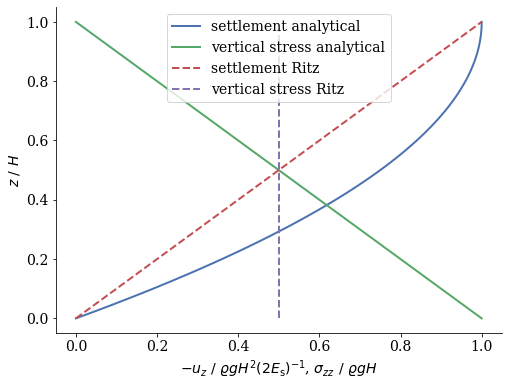

In [124]:
plt.plot(-displacement_analytical(coord),coord,label='settlement analytical')
plt.plot(stress_analytical(coord),coord,label='vertical stress analytical')
plt.plot(coord,coord,label='settlement Ritz',ls='--')
plt.plot(np.ones(len(coord))/2,coord,label='vertical stress Ritz',ls='--')
plt.legend()
plt.xlabel('$-u_z\ /\ \\varrho g H^2 (2 E_\\mathrm{s})^{-1}$, $\\sigma_{zz}\ /\ \\varrho g H$')
plt.ylabel('$z\ /\ H$');

With capturing the mean stress as a constant profile we miss the stress boundary condition. This is also seen in the end slope of the displacement curve. The linear profile is wrong, but the surface settlement is correctly captured.

A **quadratic Ansatz** of the following form

$$
    \tilde{u}_z = \frac{a_2}{2} z^2 + a_1 z + a_0
$$

fulfills the Dirichlet bc with $a_0=0$. Stationarity then implies (summation over $i$)

$$
    \delta \Pi = \frac{\partial \Pi}{\partial a_i} \delta a_i \ \forall \delta a_i
$$

with 

$$
    \Pi = \int \frac{E_\text{s}}{2} (a_2 z + a_1)^2\, \text{d}V + \int \varrho g \left( \frac{a_2}{2}z^2 + a_1 z \right)\,\text{d}V.
$$

Therefore, from

\begin{align}
    \frac{\partial \Pi}{\partial a_1} &= 0 =  \int \limits_0^H E_\text{s} (a_2 z + a_1) \,\text{d}z + \int \limits_0^H \varrho g  z \,\text{d}z
    \\
    \frac{\partial \Pi}{\partial a_2} &= 0 =  \int \limits_0^H E_\text{s} (a_2 z + a_1) z \,\text{d}z + \int \limits_0^H \varrho g  \frac{z^2}{2} \,\text{d}z
\end{align}

we obtain a linear equation system:

In [125]:
E, z, H, rho, g = sp.symbols('E_s z H varrho g', positive=True)
a_1, a_2 = sp.symbols('a_1 a_2')
ansatz = a_2/2 * z**2 + a_1*z
ansatz

           2
       a₂⋅z 
a₁⋅z + ─────
         2  

In [126]:
stationarity_conditions = (sp.integrate(E*ansatz.diff(z)*(ansatz.diff(z).diff(a_1)) + rho*g*ansatz.diff(a_1),(z,0,H)),
                           sp.integrate(E*ansatz.diff(z)*(ansatz.diff(z).diff(a_2)) + rho*g*ansatz.diff(a_2),(z,0,H)))
stationarity_conditions

⎛                                     2                           ⎞
⎜           2 ⎛Eₛ⋅a₂   g⋅varrho⎞  Eₛ⋅H ⋅a₁    3 ⎛Eₛ⋅a₂   g⋅varrho⎞⎟
⎜Eₛ⋅H⋅a₁ + H ⋅⎜───── + ────────⎟, ──────── + H ⋅⎜───── + ────────⎟⎟
⎝             ⎝  2        2    ⎠     2          ⎝  3        6    ⎠⎠

which we solve for the coefficients $a_i$:

In [127]:
coefficients = sp.solve(stationarity_conditions,a_1,a_2)
coefficients

⎧    -H⋅g⋅varrho       g⋅varrho⎫
⎨a₁: ────────────, a₂: ────────⎬
⎩         Eₛ              Eₛ   ⎭

With this, the exact solution is once again recovered:

$$
    \tilde{u}_z = \frac{\varrho g H^2}{2E_\text{s}} \left[ \left(\frac{z}{H}\right)^2 - 2 \frac{z}{H} \right]
$$

Let's also check the **trigonometric Ansatz** again (which just so happens to fulfill both bc types here)

$$
    \tilde{u}_z = a \sin \left( \frac{\pi z}{2H} \right)
$$

In [128]:
ansatz_trig = a_1 * sp.sin(sp.pi*z/(2*H))
ansatz_trig

      ⎛π⋅z⎞
a₁⋅sin⎜───⎟
      ⎝2⋅H⎠

In [129]:
stationarity_condition_trig = sp.integrate(E*ansatz_trig.diff(z)*(ansatz_trig.diff(z).diff(a_1)) + rho*g*ansatz_trig.diff(a_1),(z,0,H))
stationarity_condition_trig

 2                     
π ⋅Eₛ⋅a₁   2⋅H⋅g⋅varrho
──────── + ────────────
  8⋅H           π      

In [130]:
coeff = sp.solve(stationarity_condition_trig,a_1)
coeff

⎡     2          ⎤
⎢-16⋅H ⋅g⋅varrho ⎥
⎢────────────────⎥
⎢      3         ⎥
⎣     π ⋅Eₛ      ⎦

Thus, the solution reads

$$
    \tilde{u}_z = -\frac{\varrho g H^2}{2 E_\text{s}} \frac{32}{\pi^3}  \sin \left( \frac{\pi }{2} \xi \right)
$$

and

$$
    \sigma_{zz} = \varrho g H \frac{8}{\pi^2} \cos \left( \frac{\pi }{2} \xi \right)
$$

In [131]:
displacement_ritz = lambda xi: - 32/(np.pi**3) * np.sin(np.pi/2 * xi)
stress_ritz = lambda xi: 8/np.pi**2 * np.cos(np.pi/2 * xi)

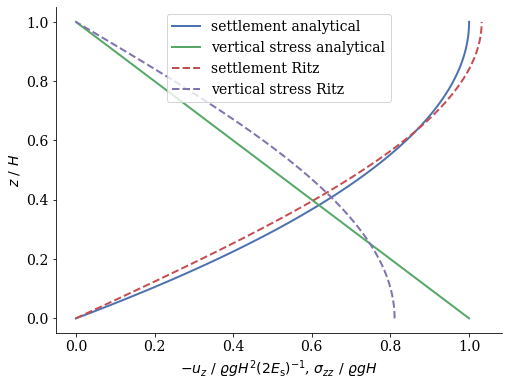

In [132]:
plt.plot(-displacement_analytical(coord),coord,label='settlement analytical')
plt.plot(stress_analytical(coord),coord,label='vertical stress analytical')
plt.plot(-displacement_ritz(coord),coord,label='settlement Ritz',ls='--')
plt.plot(stress_ritz(coord),coord,label='vertical stress Ritz',ls='--')
plt.legend()
plt.xlabel('$-u_z\ /\ \\varrho g H^2 (2 E_\\mathrm{s})^{-1}$, $\\sigma_{zz}\ /\ \\varrho g H$')
plt.ylabel('$z\ /\ H$');

# Variational approach, principle of virtual displacements

Consider again the total potential for our special case of a load-free soil column (load-free, but subjected to its own weight)

$$ 
    \Pi = \int \limits_V \frac{E_\text{s}}{2} u_{z,z}^2\,\text{d}V + \int \limits_V \varrho g u_z \,\text{d}V
$$

We can require stationarity with respect to the as yet unspecified solution functional and its derivative:

$$
    \delta \Pi = 0 = \frac{\partial \Pi}{\partial u_z} \delta u_z + \frac{\partial \Pi}{\partial u_{z,z}} \delta u_{z,z}
$$

The only condition we place is that the variations $\delta u$ vanish on Dirichlet boundaries (we don't need to wiggle the solution where we know it), i.e. in our case: $\delta u(z=0)=0$ (note: the use of this is not seen here, but would be seen if we include a boundary traction into the work formulation).

This yields
$$
    0 = \int \limits_0^H E_\text{s} u_{z,z} \delta u_{z,z} \,\text{d}z + \int \limits_0^H \varrho g \delta u_z \,\text{d}z = \delta \Pi A_0^{-1}
$$

This is the well-known principle of virtual work $\delta W_\text{int} = \delta W_\text{ext}$ if we interpret our variations as kinematically compatible virtual displacements. The remaining part of the solution would follow the Ritz problem if we choose the same Ansatz for $\tilde{u}$ and $\delta \tilde{u}$.

In the next section on the Galerkin problem, we will arrive at
$$
0 = \int \limits_0^H E_\text{s} \tilde{u}_{z,z} \eta_{,z}\,\text{d}z + \int \limits_0^H \varrho g \eta \,\text{d}z
$$

We see that if we interpret the test functions $\eta$ as virtual displacements $\delta u$, Galerkin gave us the principle of virtual work.

Now that we know this, we can interpret the orthogonality condition in the Galerkin scheme as follows: when considering the integral over the entire domain, the residuals (out-of-balance forces) do not perform any virtual work.

## Bubnov-Galerkin scheme

The residual is in our case defined as

$$
r(z) = E_\text{s} \tilde{u}_{z,zz} - \varrho g
$$

We multiply the residual by a test function of which we demand that it vanishes on the Dirichlet boundary (where $u_z = 0$): $\eta(z=0) = 0$. We demand that the weighted residual vanished on average over the domain:

$$
0 = \int \limits_0^H r(z) \eta(z)\,\text{d}z = \int \limits_0^H \left( E_\text{s} \tilde{u}_{z,zz} - \varrho g \right) \eta\,\text{d}z
$$

Now we perform partial integration to shift one of the derivatives from $\tilde{u}_z$ over to the test function $\eta$. The advantage of this is that $C^0$-continuous functions could be used to approximate the displacement (i.e. piecewise linear approximations). This is not exploited in this demonstration example but will be useful for our finite elements.

$$
\begin{aligned}
0 &= \int \limits_0^H \left(\left[ E_\text{s} \tilde{u}_{z,z}\eta\right]_{,z} - E_\text{s} \tilde{u}_{z,z} \eta_{,z} - \varrho g \eta \right) \,\text{d}z
\\
0 &= \left[ E_\text{s} \tilde{u}_{z,z}\eta\right]_0^H - \int \limits_0^H \left(E_\text{s} \tilde{u}_{z,z} \eta_{,z} + \varrho g \eta \right) \,\text{d}z
\end{aligned}
$$

Because $\eta(z=0)=0$, only the top boundary term remains as the naturally appearing boundary condition (natural or Neumann bc). It corresponds to the traction on the top:
$$
\begin{aligned}
0 &= E_\text{s} \tilde{u}_{z,z}(z=H)\eta(z=H) - \int \limits_0^H \left(E_\text{s}\tilde{u}_{z,z} \eta_{,z} + \varrho g \eta \right) \,\text{d}z
\\
&=-\bar{\sigma}_{zz}(z=H)\eta(z=H) - \int \limits_0^H \left(E_\text{s} \tilde{u}_{z,z} \eta_{,z} + \varrho g \eta \right) \,\text{d}z
\end{aligned}
$$

Bringing all known quantities to the right hand side yields:
$$
\int \limits_0^H E_\text{s} \tilde{u}_{z,z} \eta_{,z}\,\text{d}z = -\bar{\sigma}_{zz}|_H\eta|_H - \int \limits_0^H \varrho g \eta \,\text{d}z
$$

Since the traction on top is 0 in our case, the boundary term simply vanishes and we're left with:
$$
\int \limits_0^H E_\text{s} \tilde{u}_{z,z} \eta_{,z}\,\text{d}z = - \int \limits_0^H \varrho g \eta \,\text{d}z
$$

To solve this, we substitute a linear Ansatz $\tilde{u}_z = a z$ which fulfils the essential boundary conditions ($u_z|_0 = 0$) and take the test function to be of the same form: $\eta = b z$.

$$
\int \limits_0^H E_\text{s} a b \,\text{d}z = - \int \limits_0^H \varrho g b z \,\text{d}z
$$

Since $b$ is a constant, we can pull it out of the integral: 

$$
\begin{aligned}
 0 &= b \left[ \int \limits_0^H E_\text{s} a \,\text{d}z + \int \limits_0^H \varrho g z \,\text{d}z \right]
\end{aligned}
$$

We furthermore demand that this equation hold for arbitrary $b$ such that the term in the brackets has to vanish, giving us an equation to determine a:

$$
 \int \limits_0^H E_\text{s} \,\text{d}z\ a = - \int \limits_0^H \varrho g z \,\text{d}z
$$

Here we see the stiffness matrix, the unknown $a$, and the right-hand-side terms. We will see this pattern over and over again so that we always end up with a linear system in the form:

$$
    \mathbf{K} \mathbf{u} = \mathbf{f}^\text{ext} \qquad \text{or} \qquad \mathbf{f}^\text{int} = \mathbf{f}^\text{ext} 
$$

In this simple example, the stiffness matrix contains only the material's stiffness.

The solution here simply follows as
$$
    a = -\frac{\int \limits_0^H \varrho g z \,\text{d}z}{\int \limits_0^H E_\text{s} \,\text{d}z} = - \frac{\varrho gH}{2E_\text{s}}
$$

Therefore,
$$
    \tilde{u}_z = - \frac{\varrho g H^2}{2E_\text{s}} \frac{z}{H}
$$
and
$$
    \sigma_{zz} = \frac{\varrho g H}{2}
$$

In [133]:
def displacement_galerkin(xi):
    return -xi

def stress_galerkin(xi):
    return 1./2.*np.sign(xi+1.e-16)

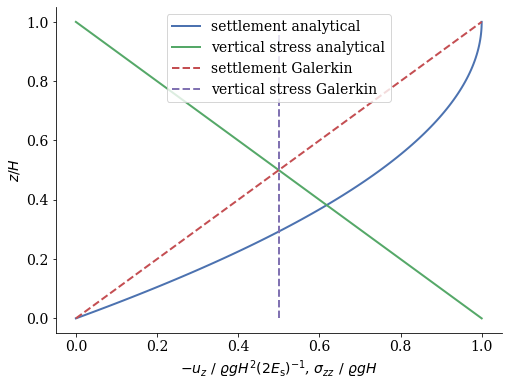

In [134]:
plt.plot(-displacement_analytical(coord),coord,label='settlement analytical')
plt.plot(stress_analytical(coord),coord,label='vertical stress analytical')
plt.plot(-displacement_galerkin(coord),coord,label='settlement Galerkin',ls='--')
plt.plot(stress_galerkin(coord),coord,label='vertical stress Galerkin',ls='--')
plt.legend()
plt.xlabel('$-u_z\ /\ \\varrho g H^2 (2 E_\\mathrm{s})^{-1}$, $\\sigma_{zz}\ /\ \\varrho g H$')
plt.ylabel('$z/H$');

We observe that stress result corresponds to the mean stress and that both displacement boundary values match the exact solution, but the internal distribution is only as good as the approximation.
We furthermore see, that the traction boundary condition cannot be met well due to the constant-stress approximation. 

So let's try a trigonometric Ansatz. Due to the properties of the Galerkin scheme, the Ansatz only has to fulfill the essential boundary conditions. Creating a quadratic Ansatz is thus a lot easier than in the collocation example. However, let's simply re-use

$$
    \tilde{u}_z = a \sin \left( \frac{\pi z}{2H} \right) \qquad \text{and} \qquad \eta_z = b \sin \left( \frac{\pi z}{2H} \right)
$$

Substitution into 

$$
\int \limits_0^H E_\text{s} \tilde{u}_{z,z} \eta_{,z}\,\text{d}z = - \int \limits_0^H \varrho g \eta \,\text{d}z
$$

yields

$$
\int \limits_0^H E_\text{s} \frac{ab\pi^2}{4H^2} \cos^2 \left( \frac{\pi z}{2H} \right) \,\text{d}z = - \int \limits_0^H \varrho g b \sin \left( \frac{\pi z}{2H} \right) \,\text{d}z
$$

The constant $b$ again falls out as arbitrary and we end up with $\mathbf{K} \mathbf{u} = \mathbf{f}^\text{ext}$ in the form

$$
 \int \limits_0^H \frac{E_\text{s} \pi^2}{4H^2} \cos^2 \left( \frac{\pi z}{2H} \right) \,\text{d}z\ a = - \int \limits_0^H \varrho g \sin \left( \frac{\pi z}{2H} \right) \,\text{d}z
$$

Let Python do the work ...

In [135]:
RHS = -gamma*sp.sin(sp.pi*z/(2*H))
RHS

      ⎛π⋅z⎞
-γ⋅sin⎜───⎟
      ⎝2⋅H⎠

In [136]:
sp.integrate(RHS,(z,0,H))

-2⋅H⋅γ 
───────
   π   

In [137]:
LHS = E*sp.pi**2/(4*H**2)*(sp.cos(sp.pi*z/(2*H)))**2
LHS

 2       2⎛π⋅z⎞
π ⋅Eₛ⋅cos ⎜───⎟
          ⎝2⋅H⎠
───────────────
         2     
      4⋅H      

In [138]:
sp.integrate(LHS,(z,0,H))

 2   
π ⋅Eₛ
─────
 8⋅H 

In [139]:
sp.integrate(RHS,(z,0,H))/sp.integrate(LHS,(z,0,H))

     2   
-16⋅H ⋅γ 
─────────
   3     
  π ⋅Eₛ  

We thus find:

$$
    a = -\frac{16 \varrho g H^2}{E_\text{s}\pi^3}
$$

In [140]:
def displacement_galerkin2(xi): #in \rho g H^2/(2E_s)
    return - 32/(np.pi**3) * np.sin(np.pi/2 * xi)

def stress_galerkin2(xi): # in \rho g H
    return 8/np.pi**2 * np.cos(np.pi/2 * xi)

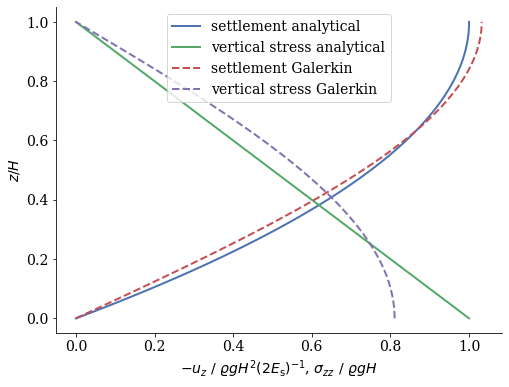

In [141]:
plt.plot(-displacement_analytical(coord),coord,label='settlement analytical')
plt.plot(stress_analytical(coord),coord,label='vertical stress analytical')
plt.plot(-displacement_galerkin2(coord),coord,label='settlement Galerkin',ls='--')
plt.plot(stress_galerkin2(coord),coord,label='vertical stress Galerkin',ls='--')
plt.legend()
plt.xlabel('$-u_z\ /\ \\varrho g H^2 (2 E_\\mathrm{s})^{-1}$, $\\sigma_{zz}\ /\ \\varrho g H$')
plt.ylabel('$z/H$');

No arbitrary collocation point had to be chosen. Instead, an optimal solution was found. Nevertheless, the stress approximation is still hampered by the choice of the approximation function which determines its shape.